Avtor: **Nik Kurent, 23170389**

Datum: 13. maj 2020

*Potrjujem, da sem avtor projektne naloge in da sem vso vsebino pripravil sam. V primeru, da se ugotovi plagiatorstvo se zavedam, da ne bom izpolnjeval pogojev za pristop k izpitu.*

---

In [1]:
# Namestitev toc2
%sx conda install -c conda-forge jupyter_contrib_nbextensions -y
%sx jupyter contrib nbextension install --user
%sx jupyter nbextension enable toc2/main

['Enabling notebook extension toc2/main...', '      - Validating: ok']

<h1>Kazalo<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Definicija-naloge" data-toc-modified-id="Definicija-naloge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Definicija naloge</a></span></li><li><span><a href="#Simbolno-reševanje" data-toc-modified-id="Simbolno-reševanje-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simbolno reševanje</a></span><ul class="toc-item"><li><span><a href="#Računanje-reakcij-v-podporah:" data-toc-modified-id="Računanje-reakcij-v-podporah:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Računanje reakcij v podporah:</a></span></li><li><span><a href="#Računanje-prereza-nosilca" data-toc-modified-id="Računanje-prereza-nosilca-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Računanje prereza nosilca</a></span></li><li><span><a href="#Izračun-vztrajnostnega-momenta-prereza" data-toc-modified-id="Izračun-vztrajnostnega-momenta-prereza-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Izračun vztrajnostnega momenta prereza</a></span></li><li><span><a href="#Izračun-maksimalne-upogibne-napetosti" data-toc-modified-id="Izračun-maksimalne-upogibne-napetosti-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Izračun maksimalne upogibne napetosti</a></span></li><li><span><a href="#Izračun-velikosti-povesa" data-toc-modified-id="Izračun-velikosti-povesa-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Izračun velikosti povesa</a></span></li></ul></li><li><span><a href="#Sistemi-linearnih-enačb" data-toc-modified-id="Sistemi-linearnih-enačb-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sistemi linearnih enačb</a></span></li><li><span><a href="#Interpolacija" data-toc-modified-id="Interpolacija-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Interpolacija</a></span></li><li><span><a href="#Reševanje-enačb-(iskanje-ničel)" data-toc-modified-id="Reševanje-enačb-(iskanje-ničel)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Reševanje enačb (iskanje ničel)</a></span></li><li><span><a href="#Odvajanje" data-toc-modified-id="Odvajanje-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Odvajanje</a></span></li><li><span><a href="#Reševanje-diferencialnih-enačb" data-toc-modified-id="Reševanje-diferencialnih-enačb-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Reševanje diferencialnih enačb</a></span></li><li><span><a href="#Viri" data-toc-modified-id="Viri-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Viri</a></span></li></ul></div>

---

# Definicija naloge 

Na sliki je nosilec T profila, ki je obremenjen z silo F ter kontinuirno obremenitvijo q.

izračunajte:

* velikost maksimalne upogibne napetosti.
* velikost povesa na koncu nosilca

<img src="nosilec.png" width=500>

Podatki naloge so sledeči:

* **q** = 3 $\frac{kN}{m}$
* **F** = 1.2 $kNm$
* **a** = 6 m 
* **b** = 3.7 m
* **E** = 210 N/mm^2
* **v** = 68 mm
* **Š** = 18 mm

---

In [12]:
#Uvoz knjižnic
import sympy as sym
import numpy as np
import sympy as sym
sym.init_printing()
from sympy.abc import sigma
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.integrate import solve_bvp
from scipy.optimize import root
!pip install import_ipynb

# Simbolno reševanje

## Računanje reakcij v podporah:

$$A_x = 0$$
$$-A_z - B_z + F = 0$$
$$B_z\cdot a - F\cdot (a + b) - q\cdot a^2/2= 0$$

Za simbono reševaje najprej definiramo spremenljivke. Ter nato zapišemo reakcije s pomočjo knjižnice symPy. Pri čemer lahko izpustimo reakcije v smeri x saj je njihova vrednost enaka 0

In [13]:
q_sym, Az_sym, Bz_sym, E_sym, F_sym, a_sym, b_sym = sym.symbols('q, A_z, B_z, E, F, a, b')

In [14]:
#Reakcije 
Az_sym = (F_sym*(a_sym + b_sym) + q_sym*(a_sym**2)/2)/a_sym

Bz_sym = F_sym - Az_sym + q_sym*a_sym

Az_sym, Bz_sym

Za numerični izračun nato substituiramo simbole z podatki.

In [15]:
podatki = {'F': 1.2 ,'q': 3, 'a':6, 'b':3.7, 'E':2100000}

In [16]:
Az_num = Az_sym.subs(podatki).evalf()
Bz_num = Bz_sym.subs(podatki).evalf()

#Razultati so podani v kN
Az_num, Bz_num

## Računanje prereza nosilca

Po izračunu reakcij v podporah, nato za izračun upogibne napetosti rabimo nosilec prerezati da ugotovimo maksimalen moment

In [17]:
M, x = sym.symbols('M, x')

In [18]:
#izračun momenta M(x)
M = Az_sym*x - q_sym*(x**2)/2

M

In [19]:
Mmax = M.subs(podatki)
Mmax = Mmax.subs(x,6).evalf()

#Mmax pa v kNm
Mmax

## Izračun vztrajnostnega momenta prereza

Pri dani nalogi moramo za izračun upogiba določiti vztrajnostni moment T nosilca. Ker se nosilec upogiba čez koordinatno os y, izračunamo vztrajnostni moment Iy.

Potek izračuna:
* nosilec razdelimo na 2 pravokotnika
* za posamezen pravokotnik izračunamo težišče ter vztrajnostni moment
* z Stainerjevim pravilom izračunamo skupen vztrajnostni moment Iy

In [20]:
t_z, v, š, A, t_s, t, Iys, Iyz, Iy, = sym.symbols('t_z, v, š, A, t_s, t, Iys, Iyz, Iy')

In [21]:
podatki2 = {v:68, š:18, A:1224}

#Zgornji pravokotnik
t_z = v/2
tz_num = t_z.subs(podatki2)

#Spodnji pravokotnik
t_s = v + š/2
ts_num = t_s.subs(podatki2)

#skupno težišče
t = (t_z*A + t_s*A)/(2*A)
t_num  = t.subs(podatki2)

sym.simplify(t), t_num

In [22]:
#vztrajnostni moment zgornjega pravokotnika
Iyz = (š*v**3)/12 + (t - t_z)**2 * A
Iyz_num = Iyz.subs(podatki2)

#Iyz je podan v mm^4
sym.simplify(Iyz), Iyz_num

In [23]:
#vztrajnostni moment spodnjega pravokotnika
Iys = (v*š**3)/12 + (t - t_s)**2 * A
Iys_num = Iys.subs(podatki2)

#Iys je podan v mm^4
sym.simplify(Iys), Iys_num

In [24]:
#vztrajnostni moment
Iy = Iyz_num + Iys_num

#Razultat podan v mm^4
Iy

Vztrajnostni moment lahko izračunamo na klasičen način kot je prikazano zgoraj. Poleg tega pa sem napisal tudi program, ki nam iz stranic pravokotnikov T nosilca, s pomočjo knjižnice selenium in pandas podatke vstavi v internetni kalkulator vztrajnostnih momentov internetne strani https://calcresource.com/cross-section-tee.html, ter nato vrednosti kot so površina, težišče, ter oba vztrajnostna momenta izpiše v obliki tabele.

Za delovanje progama uporabljamo knjižnjico selenium, s pomočjo katere odpremo spletni brskalnik Chrome ter zgoraj navedeno spletno stran. Nato v spletni kalkulator avtomatsko vpiše podatke, ter jih s pomočjo knjižnice pandas nato tabelira.

In [25]:
#Modul import_ipynb nam omogoča uvoziti funkcije končnic ipynb(jupyter notebook)
import import_ipynb
from Selenium import veličine_T

importing Jupyter notebook from Selenium.ipynb


Spletni kalkulator v svoje parametre sprejme celotno višino in širino nosilca, ter širino spodnjega in širino zgornjega dela pravokotnika, zato moramo naše podatke a in b preurediti.

In [26]:
veličine_T(86, 68, 18, 18)

chromedriver is already installed.
Installed chromedriver to path: C:\Users\nik7\Desktop\projektna-nik\chromedriver\chromedriver_83.0.4103.39.exe


,Višina,širina,tw,tf,površina,težišče,Ixx,Iyy[10^6]
0,86,68,18,18,2448,55.5,504696,1.63628


## Izračun maksimalne upogibne napetosti

In [27]:
napetost_max = ((Mmax*t_num)/Iy)*10**6

#napetost je podana v MPa
napetost_max

## Izračun velikosti povesa

Za skupen poves nosilca poves razdelimo na poves zaradi sile na koncu nosilca ter na poves zaradi kontinuirane obremenitve q. ker nas zanima poves na koncu nosilca, moramo pri računanju povesa zaradi kontinuirane obremenitve najprej izračunati kot pod katerim obremenitev dviga drugi del nosilca. Nato pa lahko izračunamo še poves

In [28]:
eta = a_sym/(a_sym + b_sym)
eta_num = eta.subs(podatki)
eta_num

In [29]:
#Poves zaradi sile
w1 = -(((F_sym*10**3)*((a_sym+b_sym)*10**3)**3)*((1-eta)**2))/(3*E_sym*Iy)
w1_num = w1.subs(podatki).evalf()


#zasuk zaradi kontinuirane obremenitve
alpha = (q_sym*(a_sym*10**3)**3)/(24*E_sym*Iy)
alpha_num = alpha.subs(podatki).evalf()

#Upogib na koncu nosilca, zaradi kontinuirane obremenitve
w2 = (b_sym*10**3)*sym.tan(alpha)
w2_num = w2.subs(podatki).evalf()

print(f'poves zaradi sile F je {w1_num:6.3f} mm')
print(f'Upogib zaradi kontinuirane obremenitve pa {w2_num:6.3f} mm')

w = w2_num + w1_num

print(f'Celoten upogib na koncu elementa je {w:6.3f} mm')

poves zaradi sile F je -15.458 mm
Upogib zaradi kontinuirane obremenitve pa 29.073 mm
Celoten upogib na koncu elementa je 13.615 mm


---

# Sistemi linearnih enačb 

Z sistemom linearnih enačb lahko sedaj preverimo izračun reakcij oziroma podpor.

In [30]:
F = 1.2
q = 3
a = 6
b = 3.7
E = 2100000

In [31]:
A_matrika = np.array([[1, 1], [0, a]])

b_matrika = np.array([F + q*a, F*(a+b) + q*(a**2)/2])

In [32]:
rešitev = np.linalg.solve(A_matrika, b_matrika)
rešitev

array([ 8.26, 10.94])

---

# Interpolacija

S pomočjo izračunanih dveh točk povesov, ter poznanja, da sta vrednosti povesa v točkah podpor enake 0,
lahko z interpolacijo prikažemo približno obnašanje nosilca zaradi zunanjih obremenitev.

In [33]:
#podatki pretvorjeni v druge enote
a = 6000      #[mm]
b = 3700      #[mm]
F = 1200      #[N]
q = 3         #[N/mm]
E = 2100000   #[MPa]
Iy = 1636284  #[mm^4]
L = 9700      #[mm]
eta = a/L     #[/]

In [34]:
#Izračuna točke povesa, ki jih shrani v obliki numeričnega polja
    
#poves zaradi sile F
wa = 0
w0 = ((F*(L**3)*(1-eta)*eta**2)/(9*(np.sqrt(3))*E*Iy))
wb = 0
w1 = -((F*(a+b)**3)*((1-eta)**2))/(3*E*Iy)

numerično_polje_1 = np.array([wa, w0, wb, w1])

    
#Poves zaradi kontinuirane obremenitve q
wa = 0
w0 = -(5*q*a**4)/(384*E*Iy)
wb = 0
alpha = (q*a**3)/(24*E*Iy)
w1 = b*np.tan(alpha)

numerično_polje_2 = np.array([wa, w0, wb, w1])
    
    
#Skupni poves
numerično_polje_s = numerično_polje_2 + numerično_polje_1
numerično_polje_s

array([  0.        , -11.74882181,   0.        ,  13.61530325])

In [35]:
y = numerično_polje_s
x = np.array([0, 3000, 6000, 9400])

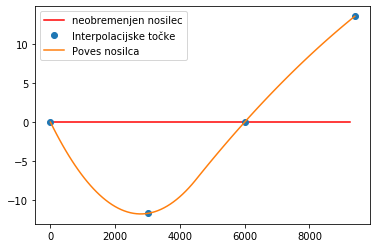

In [36]:
f = interp1d(x, y, kind='quadratic') #uporabimo kvadratične zlepke saj se te najbolj približajo povesu
x_g = np.linspace(0, 9400, 100) #definiramo numerično polje z katerim narišemo graf
plt.axhline(y=0, xmin=0.04, xmax=0.94, color='r', linestyle='-', label='neobremenjen nosilec')
plt.plot(x, y, 'o', label='Interpolacijske točke')
plt.plot(x_g, f(x_g), '-', label='Poves nosilca')
plt.legend();

---

# Reševanje enačb (iskanje ničel)

Ničle sistema, so tiste točke, pri katerih graf seka x-os. V našem primeru lahko te razberemo že iz definicije naloge. Ničle so v točkah podpor. Vendar pa lahko te določimo tudi z metodo optimize.root, kjer v funkcijo podano enačbo funkcije f, ter razdaljo kjer mislimo, da se ničle nahajajo.

In [37]:
#Prva ničla
ničla_1 = root(f, 0)

#podajanje le razultata, ki nas zanima
ničla_1['x']

array([0.])

In [38]:
#Druga ničla
ničla_2 = root(f, 6000)
ničla_2['x']

array([6000.])

---

# Odvajanje

Z odvajanjem funkcije f, ki smo jo predhodno interpolirali, lahko z prvim odvodom določimo naklon tangente nosilca. Za odvajanje bomo uporabili funkcijo numpy.gradient, v katero vstavimo funkcijo ter vrednost po kateri jo bomo odvajali.

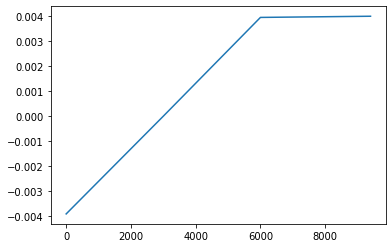

In [39]:
#Pripravimo funkcijo povesa nosilca v odvisnosti z dolžino
funkcija = f(x)

#Odvod funkcije po dolžini. Parameter edge order ni poterben pri odvajanju prvega reda
odvod = np.gradient(funkcija, x, edge_order=1)

#Grafični prikaz naklona
plt.plot(x, odvod)

Iz grafa lahko sedaj razberemo da je največji naklon pri razdalji 0, ter od druge podpore naprej. Razultati se torej skladajo z logiko saj je največji naklon pri podporah, od druge podpore naprej pa je zaradi ravnega nosilca naklon konstanten.

---

# Reševanje diferencialnih enačb

Za diferencialne enačbe pa me zanima kakšen bi bil poves nosilca če bi ta izgledal malo drugače. Tokrat je nosilec obremenjen le z kontinuirano obremenitvijo in na vsaki strani podprt z podporama.

<img src="nosilec2.png" width=500>

In [40]:
#Podatki
E = 2100000 #N/mm^2
I = 5.0e6 #mm^4
l = 8000 #mm
q = 1.5 #N/mm
x = np.linspace(0, l, 20)

In [41]:
#Funkcija porazdeljene obremenitve (pri vsaki vrednosti neodvisne spremenljivke x)
def obremenitev(x, q=q):
    return np.ones_like(x)*-q

In [42]:
#Funkcija prvih odvodov novo vpeljanih spremenljivk
def nosilec(x,y,E=E, I=I, q=q):
    return np.array([y[1],y[2],y[3], obremenitev(x)/(E*I)])

In [43]:
#definicija robnih pogojev- vrednosti, ki morajo biti 0 na robovih A in B
def robni_preostanki(y_A, y_B):
    return np.array([y_A[0],y_A[2],y_B[0],y_B[2]])

In [44]:
#Začetne vrednosti
y0 = np.zeros((4, x.size), dtype=float)
y0[1] = 1. 
y0[3] = 1. 

In [45]:
rešitev = solve_bvp(nosilec, robni_preostanki, x=x, y=y0)

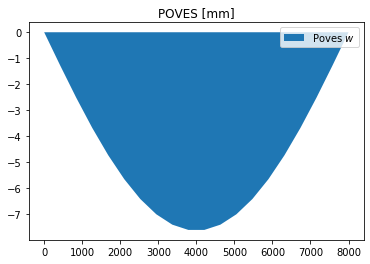

In [46]:
plt.fill_between(rešitev.x, rešitev.y[0], label='Poves $w$')
plt.title('POVES [mm]')
plt.legend()
plt.show()

# Viri

* https://jankoslavic.github.io/pypinm.io/
* http://www.geom.uiuc.edu/education/calc-init/static-beam/modeling.html
* https://stackoverflow.com/
* https://pypi.org/project/pyderman/
* https://pypi.org/project/import-ipynb/
* https://selenium-python.readthedocs.io/